In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [6]:


# Download NLTK resources if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the CSV file
df = pd.read_csv('./book_titles.csv', sep='|')

# Extract the 'simplified_title' column
titles = df['simplified_title'].fillna('')  # Handle any NaN values


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/francesco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/francesco/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
processed_titles = titles.apply(preprocess_text)


In [8]:

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for efficiency
X = vectorizer.fit_transform(processed_titles)

# Apply K-Means clustering with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Optional: Visualize clusters using PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


/home/francesco/miniconda3/envs/py310_data_analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


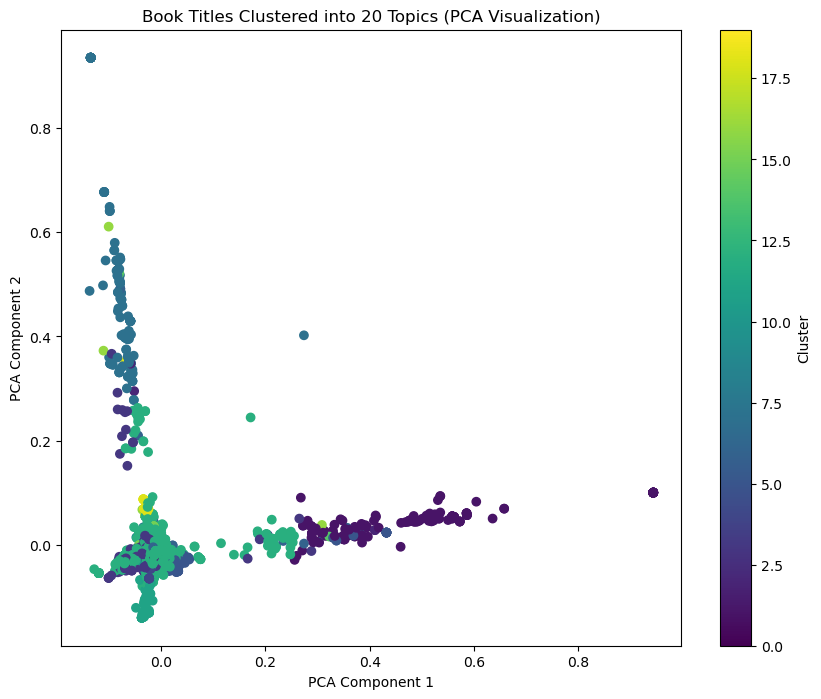

In [11]:

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Book Titles Clustered into 20 Topics (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [12]:

# Print cluster assignments (first 10 for brevity)
print(df[['simplified_title', 'cluster']].head(10))


                                    simplified_title  cluster
0       Structure interpretation classical mechanics       15
1                          motion distribution stars       12
2       Catalog emission lines astrophysical objects       12
3       Catalog emission lines astrophysical objects       12
4                  Applied solar energy introduction       12
5  Observations some nebulae receveid June read J...        3
6  some recent improvements made mountings telesc...       12
7                                           planètes       12
8                                            Planets       12
9  dilatation glace, d'après expériences faites 1...       12


In [14]:

# To see top terms per cluster
terms = vectorizer.get_feature_names_out()
for i in range(20):
    cluster_center = kmeans.cluster_centers_[i]
    top_terms_idx = cluster_center.argsort()[-10:][::-1]  # Top 10 terms
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: lunair, lorigin, vénu, mémoir, solair, atla, question, first, filant, faculté
Cluster 1: astronomi, outlin, dastronomi, cour, parti, radio, popular, manual, gener, young
Cluster 2: luniv, discuss, lévolut, bang, création, histoir, secret, astr, petit, le
Cluster 3: observ, observatori, made, greenwich, fait, royal, star, year, moon, magnet
Cluster 4: travaux, notic, scientifiqu, titr, supplément, constitut, soleil, rapport, exposé, physiqu
Cluster 5: oeuvr, complèt, arago, françoi, tome, populair, notic, scientifiqu, astronomi, posthum
Cluster 6: scienc, lacadémi, mathématiqu, rapport, physiqu, new, modern, cosmolog, méthode, lettr
Cluster 7: univers, life, complet, bang, natur, histori, mysteri, expand, creation, cosmo
Cluster 8: spiral, nebula, motion, field, veloc, rotat, globular, cluster, natur, effect
Cluster 9: einstein, collect, albert, volum, work, correspond, paper, year, berlin, write
Cluster 10: eclips, total, solar, august, sun, observ, report, expedit, corona, 

In [13]:
# ...existing code...
# Export dataframe with cluster column to a new CSV (pipe-separated to match original)
output_path = './book_titles_clustered_2.csv'
df.to_csv(output_path, sep='|', index=False)
print(f'Wrote clustered CSV to: {output_path}')
# ...existing code...

Wrote clustered CSV to: ./book_titles_clustered_2.csv
